In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [12]:
# Reading the file
diabetes_data = pd.read_csv('Datasets/diabetes.csv')

In [13]:
# Printing first five rows of data
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# Number of rows and columns in data
diabetes_data.shape

(768, 9)

In [15]:
# Getting statistical measure of data
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Separting the data and labels

In [17]:
X = diabetes_data.drop(columns= 'Outcome', axis = 1)
Y = diabetes_data['Outcome']

In [18]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Data Standardization

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X)

StandardScaler()

In [21]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
X = standardized_data
Y = diabetes_data['Outcome']
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, stratify=Y)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


Training the model

In [24]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation


Accuracy Score

In [25]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
y_pred_svm=classifier.decision_function(X_test)

In [26]:
print("Accuracy of training data: ",training_data_accuracy*100,"%")

Accuracy of training data:  78.02607076350093 %


In [27]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [28]:
print("Accuracy of test data: ",test_data_accuracy*100,"%")

Accuracy of test data:  77.05627705627705 %


Making a Predictive System

In [31]:
import pickle

In [32]:
directory_path = 'saved_models/'
# Specify the filename
filename = 'diabetes_prediction.sav'

# Concatenate directory path and filename to get the full path
file_path = directory_path + filename

# Open the file in binary write mode and dump the model
with open(file_path, 'wb') as f:
    pickle.dump(classifier, f)

ROC Curve

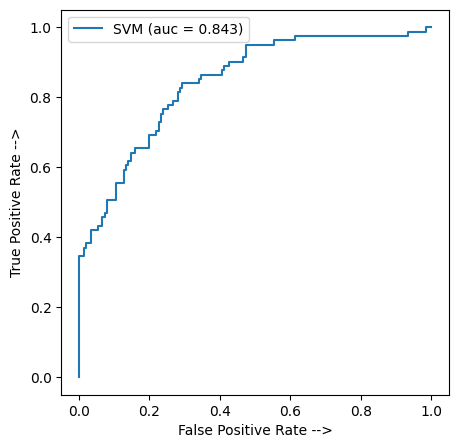

In [33]:
from sklearn.metrics import roc_curve, auc
svm_fpr, svm_tpr, threshold = roc_curve(Y_test, y_pred_svm)
auc_svm= auc(svm_fpr, svm_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-',label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [34]:
"""
Insights of using Support Vector Machines 

Effective in High Dimensional Spaces: SVMs are particularly well-suited for classification problems with high-dimensional feature spaces, like your diabetes dataset with multiple medical parameters.

Sparse Data Handling: They work well with sparse data, which is common in medical datasets where some features may not be present or measured for all observations.

Robustness: SVMs are less prone to overfitting, especially when choosing the right regularization parameter, making them robust for predictive modeling tasks like diabetes prediction.
 
"""

'\nInsights of using Support Vector Machines \n\nEffective in High Dimensional Spaces: SVMs are particularly well-suited for classification problems with high-dimensional feature spaces, like your diabetes dataset with multiple medical parameters.\n\nSparse Data Handling: They work well with sparse data, which is common in medical datasets where some features may not be present or measured for all observations.\n\nRobustness: SVMs are less prone to overfitting, especially when choosing the right regularization parameter, making them robust for predictive modeling tasks like diabetes prediction.\n \n'